# Supervised Learning Project

### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Attribute Details:
<b>ID:</b> Customer ID <br>
<b>Age:</b> Customer's age in completed years <br>
<b>Experience:</b> #years of professional experience <br>
<b>Income:</b> Annual income of the customer (doller 000) <br>
<b>ZIPCode:</b> Home Address ZIP code <br>
<b>Family:</b> Family size of the customer <br>
<b>CCAvg:</b> Avg. spending on credit cards per month (doller 000) <br>
<b>Education:</b> Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
<b>Mortgage:</b> Value of house mortgage if any. ($000) <br>
<b>Personal Loan:</b> Did this customer accept the personal loan offered in the last campaign? <br>
<b>Securities Account:</b> Does the customer have a securities account with the bank? <br>
<b>CD Account:</b> Does the customer have a certificate of deposit (CD) account with the bank? <br>
<b>Online:</b> Does the customer use internet banking facilities? <br>
<b>CreditCard:</b> Does the customer use a credit card issued by UniversalBank?
    

### 1. Read the column description and ensure you understand each attribute well

In [68]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Read the data from .csv and stored into dataframe
dfbank = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [70]:
dfbank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
#To check number of rows and columns
dfbank.shape

(5000, 14)

<b>Observation 1:</b>
   - There are 5000 rows and 14 columns in dataset. 

In [72]:
# To get number of values and data types for each attribute
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [73]:
# To confirm that any missing values in dataset
dfbank.isnull().values.any()

False

<b>Observation 2:</b>
- There is no string data type and all the columns are having integer and float data types in data set and no missing values

In [74]:
dfbank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<b> Observation 3:</b>
- Experince contains some negative values and experience can't be negative. Need to fix it.
- The max of Income, Experience, CCAvg, Mortgage, Security Account, CD Accounts, CreditCard is much high then their mean it means they contains some extream values
- 75% customers age under 56 years old.
- 75% customer''s incomes are below or equal to 98k dollers. 

In [75]:
# To find how many negative valies in Experience
dfbank[dfbank['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

<b>Observation 4:</b>
- There are 52 negative values in experience

In [76]:
dfbank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<b>Observation 5:</b>
- It looks like Family, Education, Personal Loan, Securities Account, CD Account, Online and CreditCard attributes are categorical variables

### 2. Study the data distribution in each attribute, share your findings

In [77]:
# Dropping Id column as it is unique identifier of customer and it is not required.
dfbank = dfbank.drop("ID", axis=1)

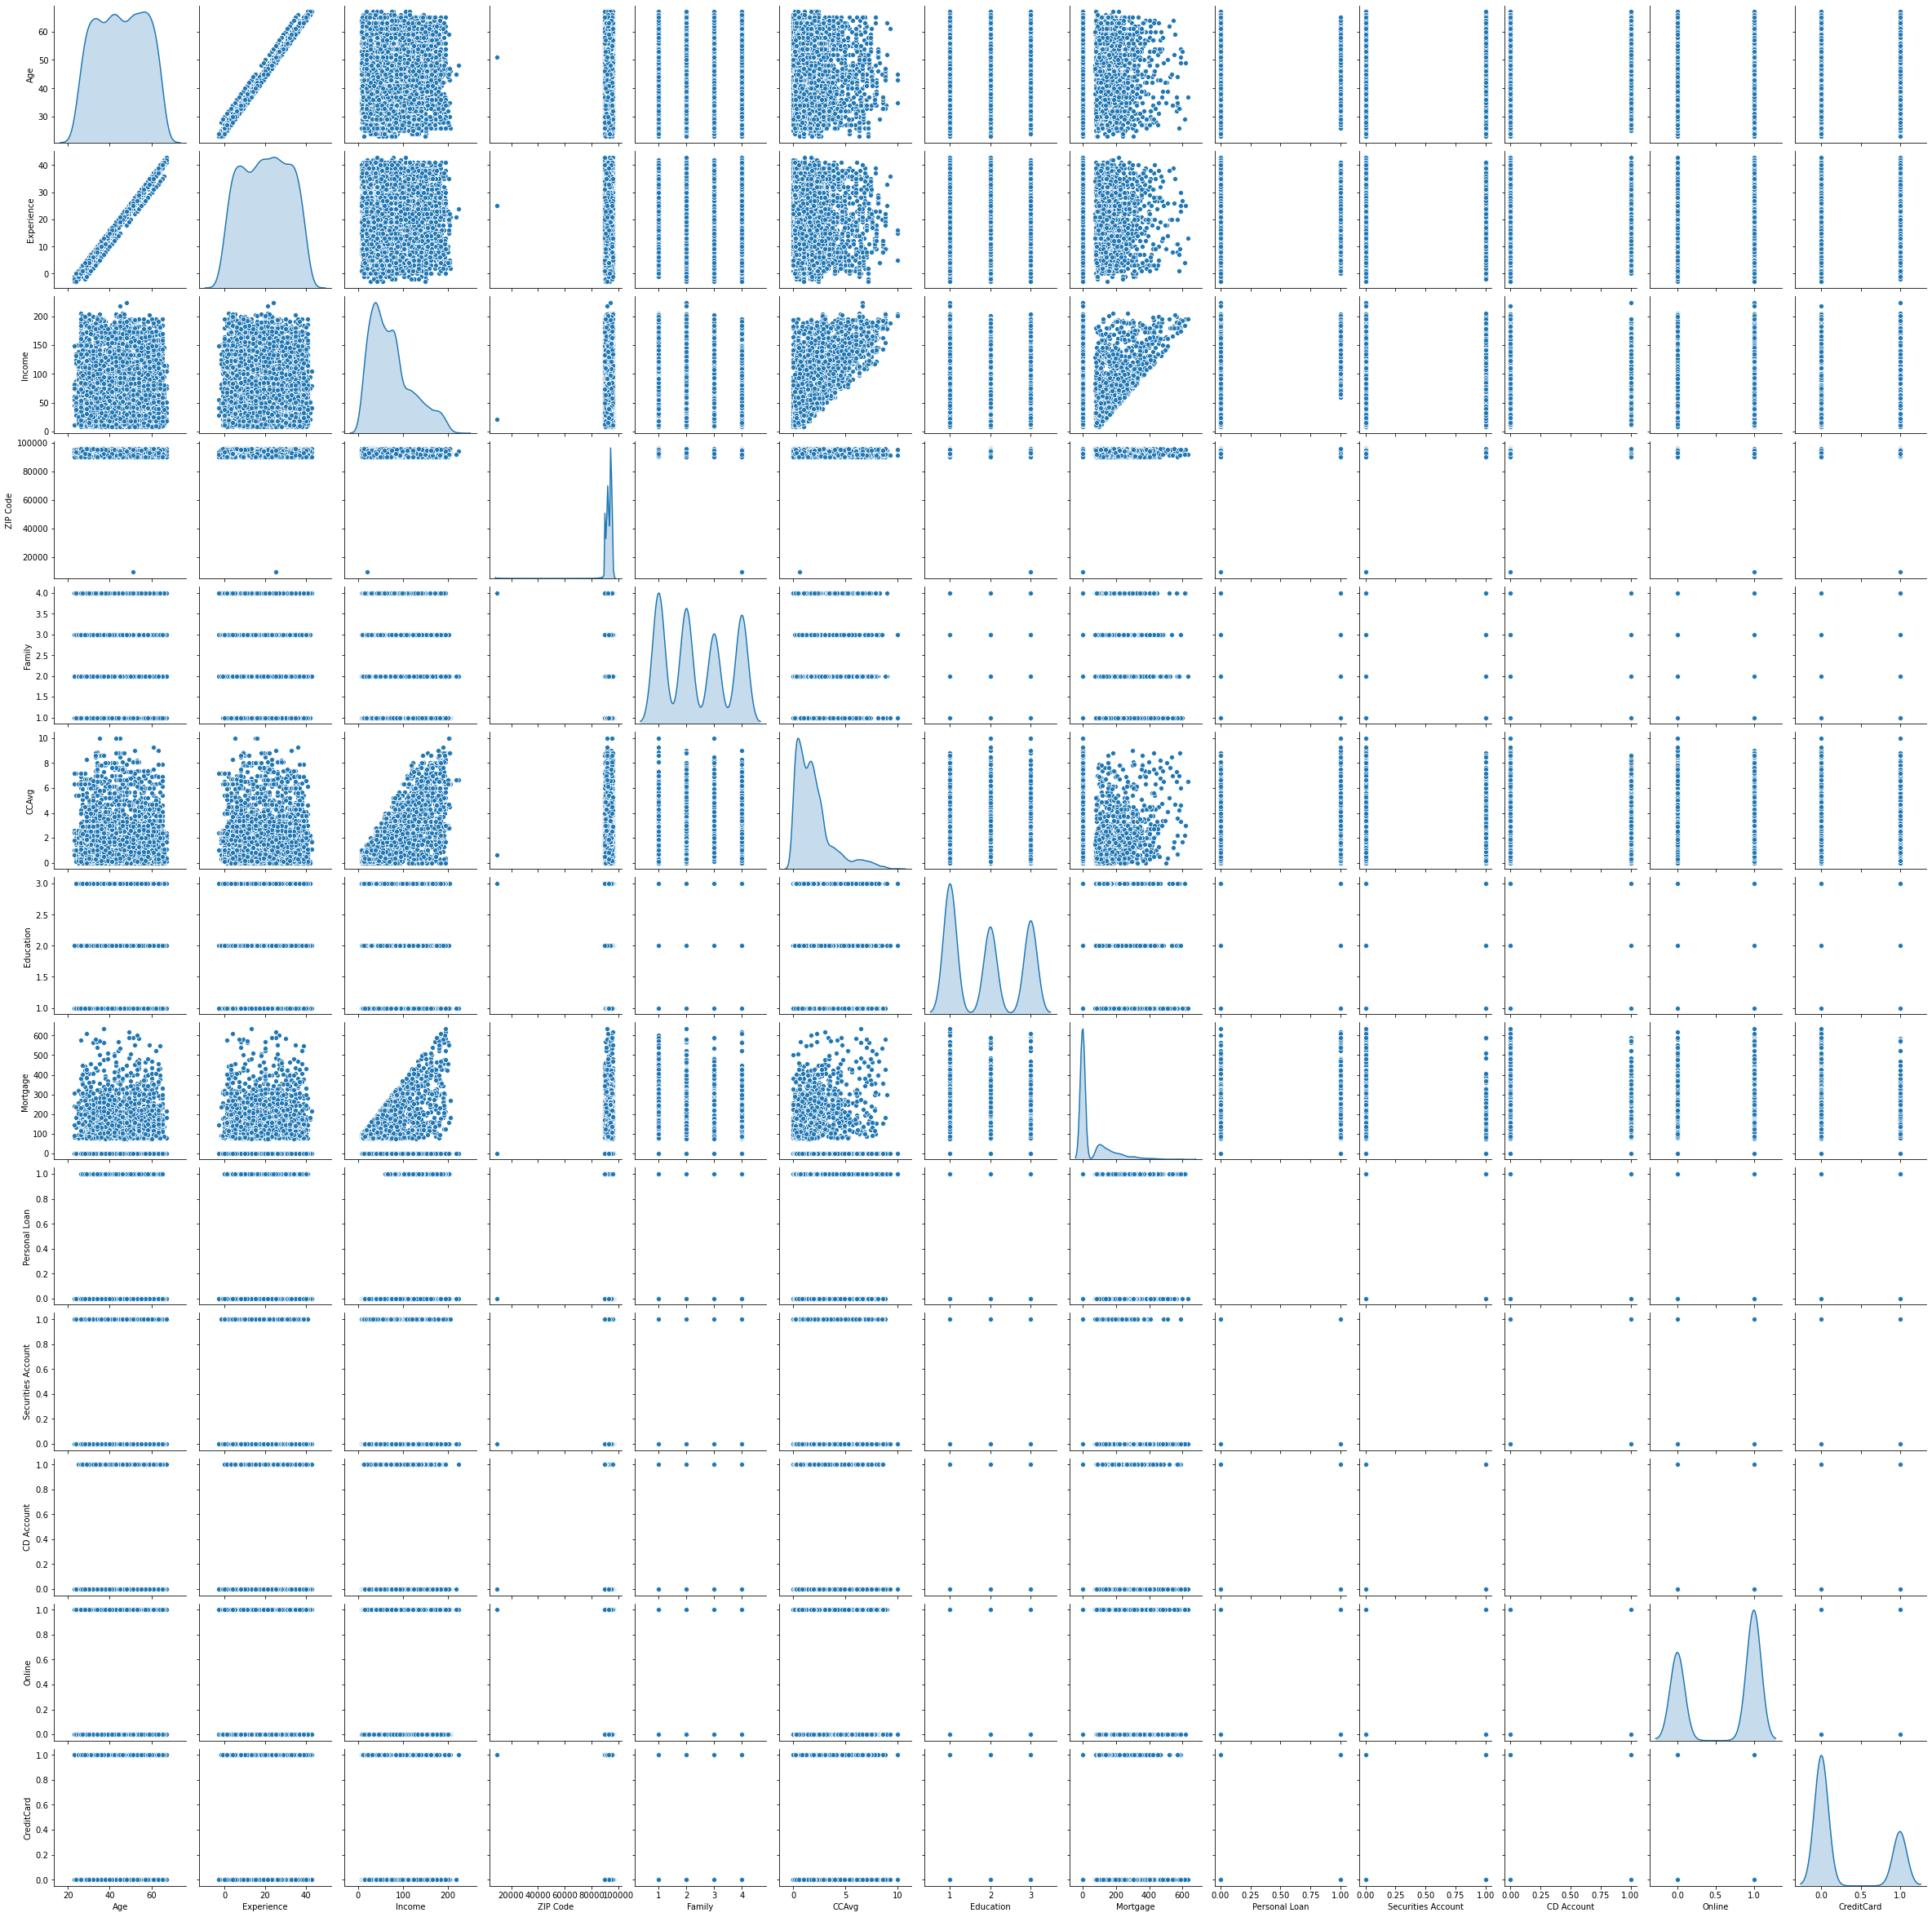

In [78]:
# Plot the graph for all the attributes
sns.pairplot(dfbank, diag_kind="kde")

In [79]:
continuous_variables = ['Age','Experience','Income','ZIP Code', 'CCAvg','Mortgage']
categorical_variables = ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']


######  Distributions of Continuous Variables 

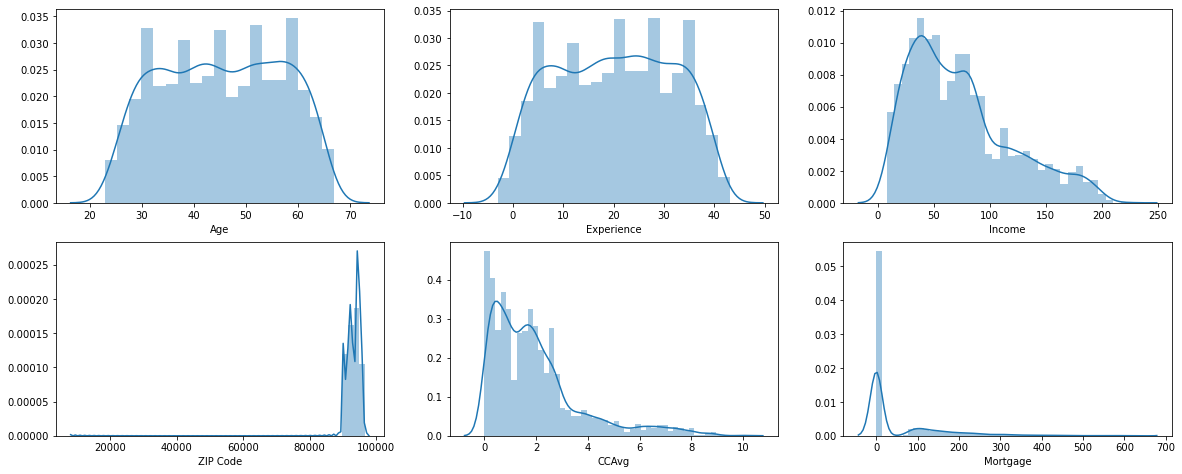

In [80]:
# Find the distributions for continuous variables
plt.figure(figsize=(20,25))
for i,col in enumerate(continuous_variables):
    plt.subplot(6,3,i+1)
    sns.distplot(dfbank[col])

<b>Observation 6:</b><br>

<b>Age</b> - It is uniformly distributed. Most of the customers age between 30 to 60. Also, it looks like median and mean is equal to 45 <br>
<b>Experience</b> - It has negative values. It should be fixed as part of preprocessing. Also, it looks like median and mean is equal to 20 <br>
<b>Income</b> - It is highly right skewed. Most of the salary range between 40k and 80k.<br>
<b>Zip Code</b> - It is negative skewed and contains value from particular region. <br>
<b>CCAvg</b> - It is highly right skewed. Very less people spend amount greater than 2.5k per month <br>
<b>Mortgage</b> - Many people have no Mortgage. The maximum value is fall in between 600k and 700k

###### Distributions of Categorical Variables

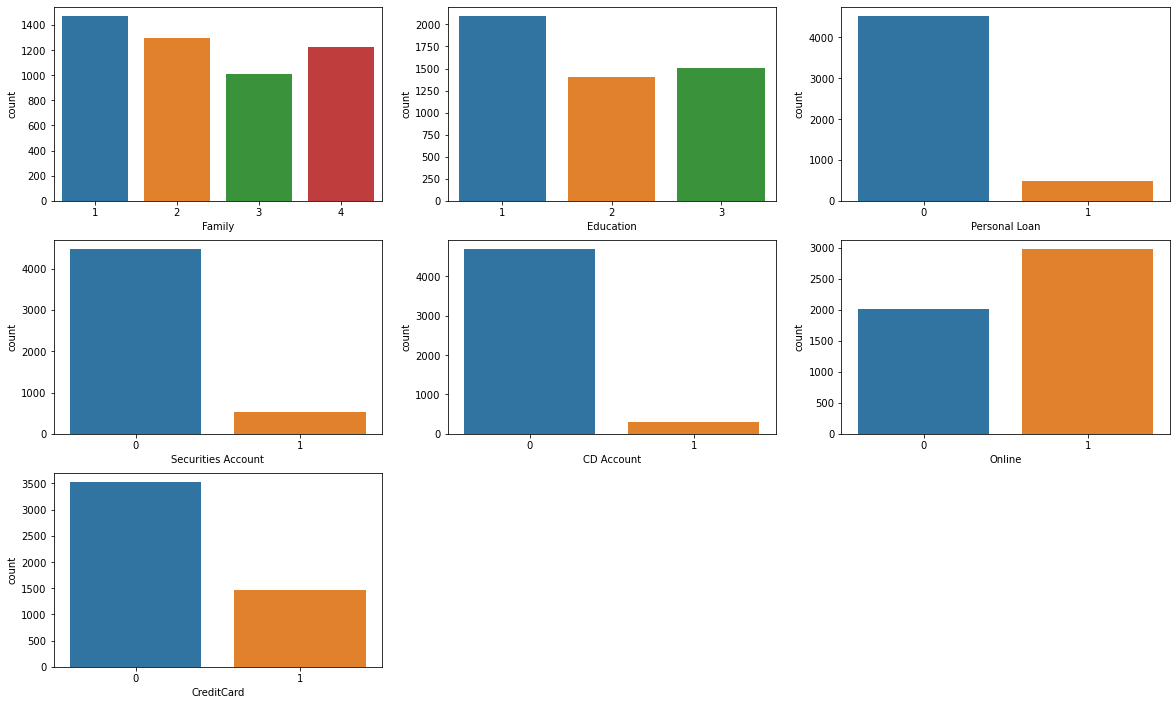

In [81]:
# Find the distributions for categorical variables
plt.figure(figsize=(20,25))
for i,col in enumerate(categorical_variables):
    plt.subplot(6,3,i+1)
    sns.countplot(dfbank[col])

<b>Observation 7:</b>
- Most of the customers do not have Securities Account, CD Account and CreditCard.
- More number of customers use internet banking facilities.
- More number of customers are undergraduate when comapre to others.
- Families with least member is highest in the sample.

###### Correlations

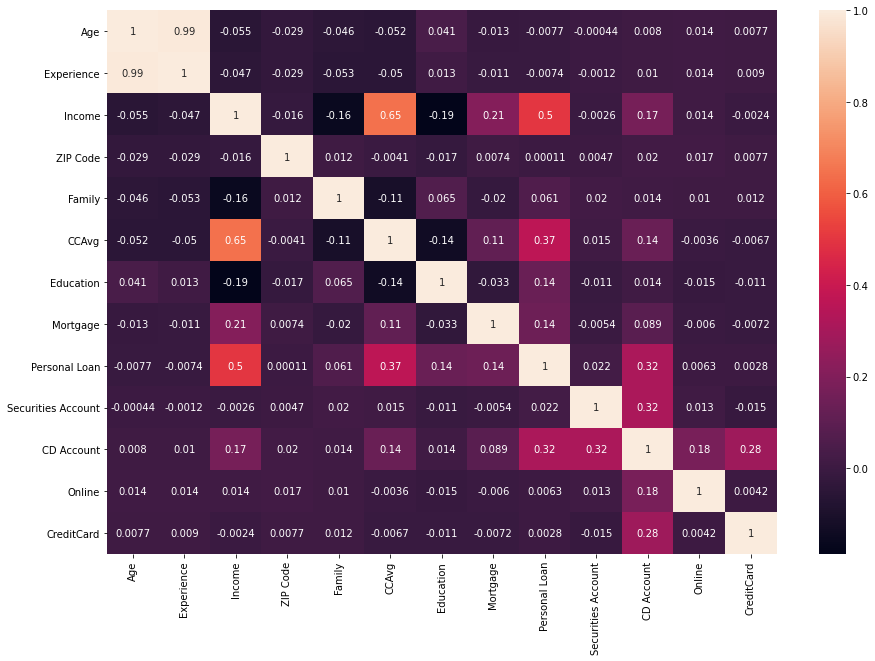

In [82]:
# Find the correlations between the variables
plt.figure(figsize=(15,10))
sns.heatmap(dfbank.corr(), annot=True)


<b>Observation 8:</b>
- Age and Experience are high correlated
- Income and CCAvg is moderately correlated

### 3. Get the target column distribution

###### Distributions on Continuous Variables vs Target Variable

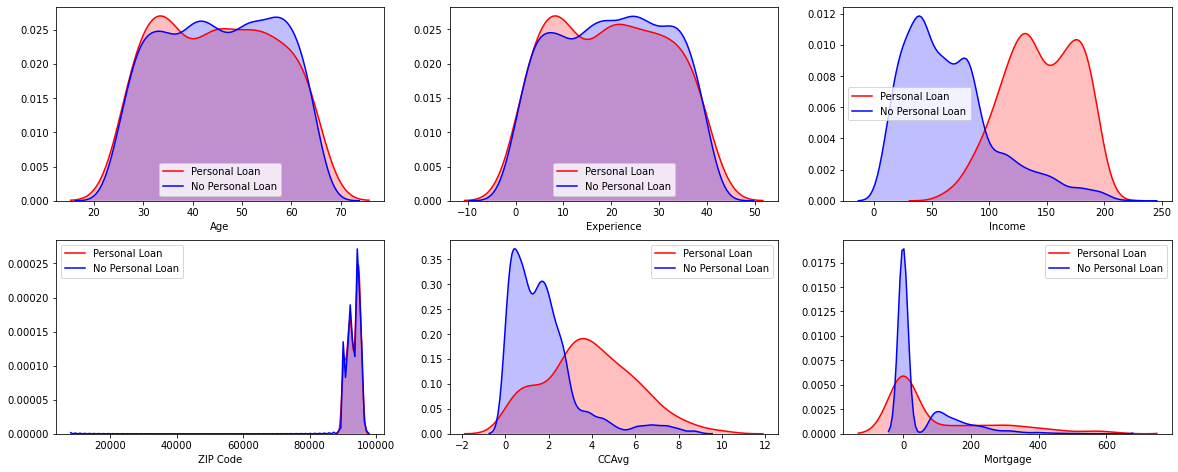

In [83]:
# Plot the distributions for all continuous variables against target variable (Personal Loan)
plt.figure(figsize=(20,25))
for i,col in enumerate(continuous_variables):
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(dfbank.loc[(dfbank["Personal Loan"]==1), 
            col], color='r', shade=True, Label='Personal Loan',) 
    sns.kdeplot(dfbank.loc[(dfbank["Personal Loan"]==0), 
            col], color='b', shade=True, Label='No Personal Loan') 
    plt.xlabel(col)

<b>Observation 9:</b>
- Age and Experience don't show variations with Personal Loan.
- Income has a good effect on Personal Loan. Customers with high income have more chances of having personal loan. 
- CCAvg also has good effect on Personal Loan. Customers with personal loand have high Average spending on creadit card per month. 
- Customers want to have high Mortgage have opted for Personal Loan

Income and CCAvg are strong attributes which have effect on Personal Loan. Hence, will analysis Income and CCAvg with each attribute along with personal loan. 

###### Distributions of continuous variables with Income and Personal Loan

In [84]:
conincome=continuous_variables.copy()
conincome.remove('Income')

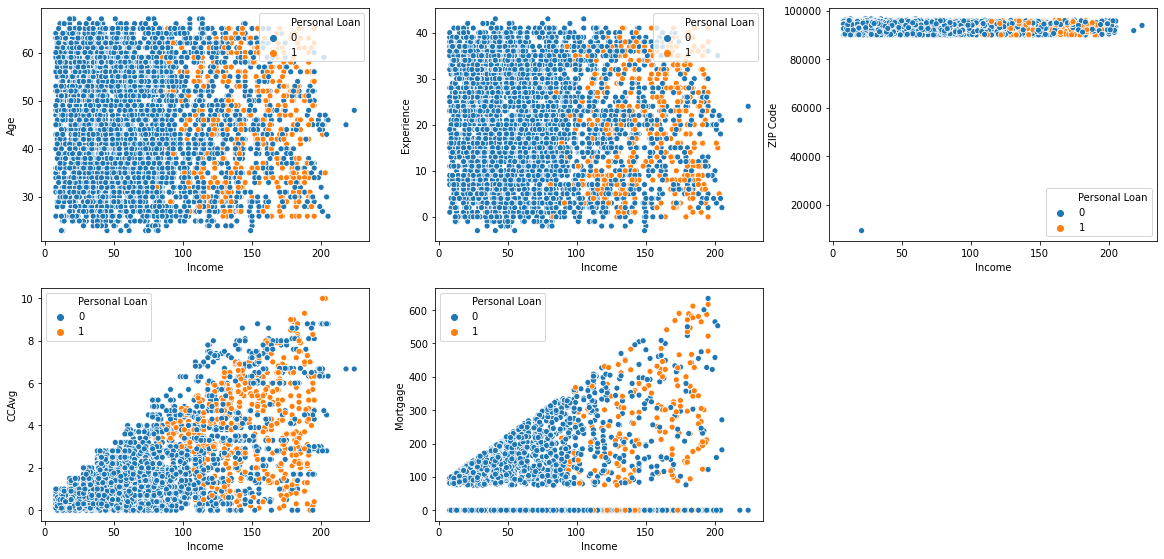

In [85]:
# Plot the distributions graph for continuous variables with income and personal loan
fig=plt.figure(figsize=(20,30))
for i,col in enumerate(conincome):
    plt.subplot(6,3,i+1)
    sns.scatterplot('Income',col,hue='Personal Loan',data=dfbank)

<b>Observation 10:</b>
- Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
- ZIP Code shows that all the customers from particular area and they have no pattern in chances of having personal loan.
- Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high value of house mortgage

###### Distributions of categorical variables with Income and Personal Loan

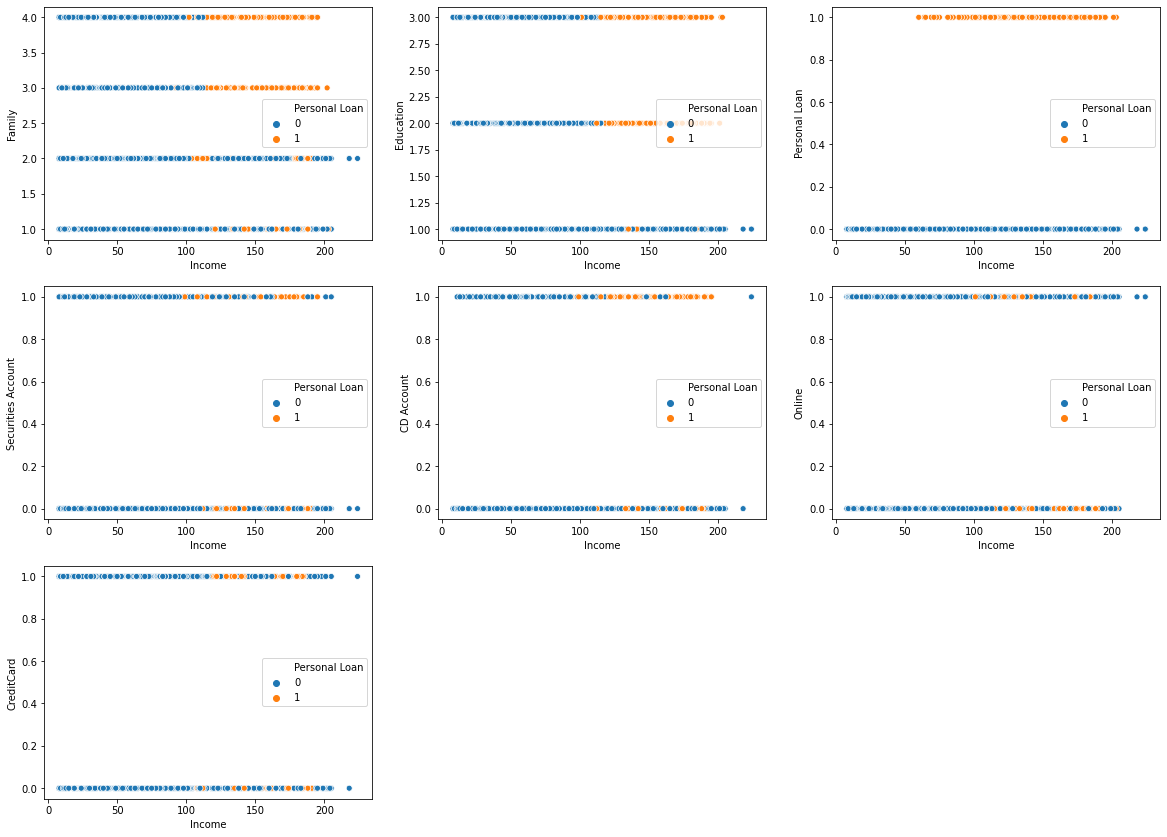

In [86]:
# Plot the distributions graph for categorical variables with Income and Personal loan
figr=plt.figure(figsize=(20,30))
for i,col in enumerate(categorical_variables):
    plt.subplot(6,3,i+1)
    sns.scatterplot('Income',col,hue='Personal Loan',data=dfbank)
    

<b>Observation 11:</b>
- Customers with high Degrees and having family size greater than 2 with high income have personal loan.
- Customers with CD Accounts have chances of having Personal Loan
- Customers who earn more than 50k have chances of having Personal Loan

###### Distributions of continuous variables with CCAvg and Personal Loan

In [87]:
concavg=continuous_variables.copy()
concavg.remove('CCAvg')

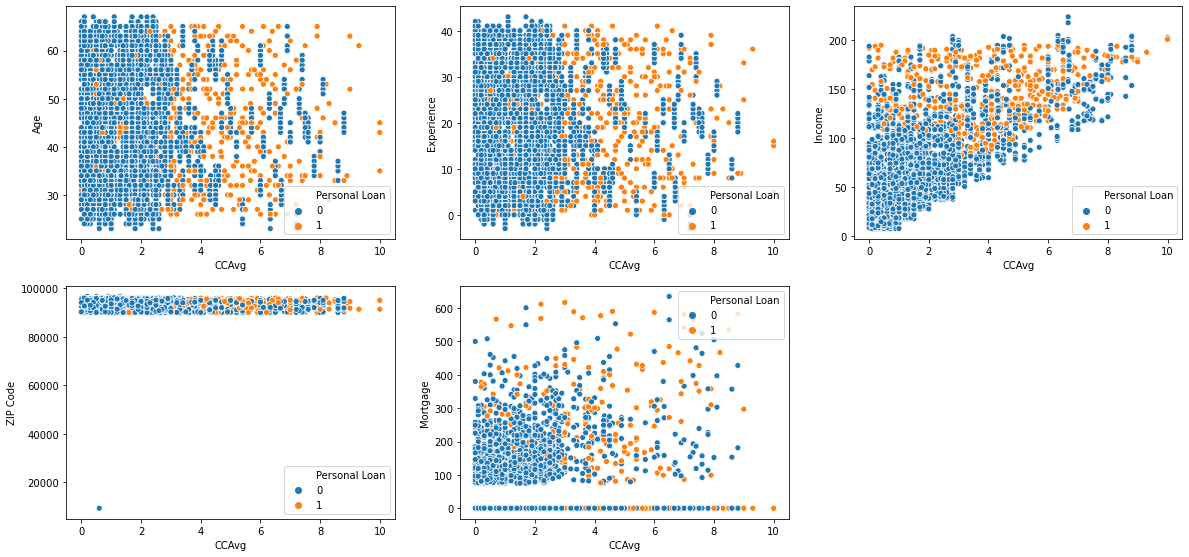

In [88]:
# Plot the distributions graph for continuous variables with CCAvg and Personal loan
fig=plt.figure(figsize=(20,30))
for i,col in enumerate(concavg):
    plt.subplot(6,3,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal Loan',data=dfbank)

<b>Observation 12:</b>
- Age and Experience show same patterns on customers who have personal loan or not.
- Customers with Low CCAvg and Low Mortgate who have not opted personal loan. 
- Many Customers with high income opted personal loan. Many cusotmers who spending money between 3k and 7k per month on credit cart have opted personal loan

###### Distributions of categorical variables with CCAvg and Personal Loan

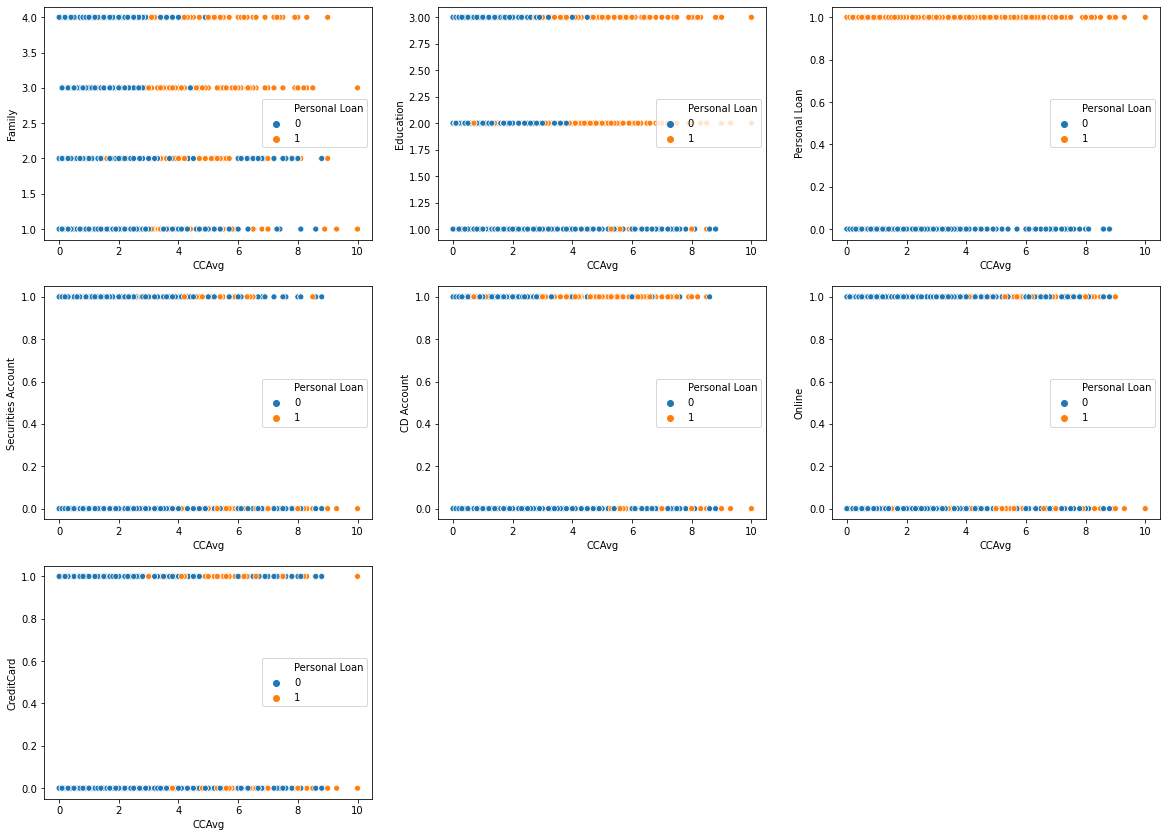

In [89]:
# Plot the distributions graph for categorical variables with CCAvg and Personal loan
figr=plt.figure(figsize=(20,30))
for i,col in enumerate(categorical_variables):
    plt.subplot(6,3,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal Loan',data=dfbank)

<b>Observation 13:</b>
- Customers with high Degrees and having family size greater than 2 with high CCAvg have personal loan.
- Customers with CD Accounts have chances of having Personal Loan.
- Customers who earn more than 50k have chances of having Personal Loan.
- Many Cusotmers who spending money between 4k and 7k per month on credit cart have opted personal loan.

###### Distributions on Categorical Variables vs Target Variable

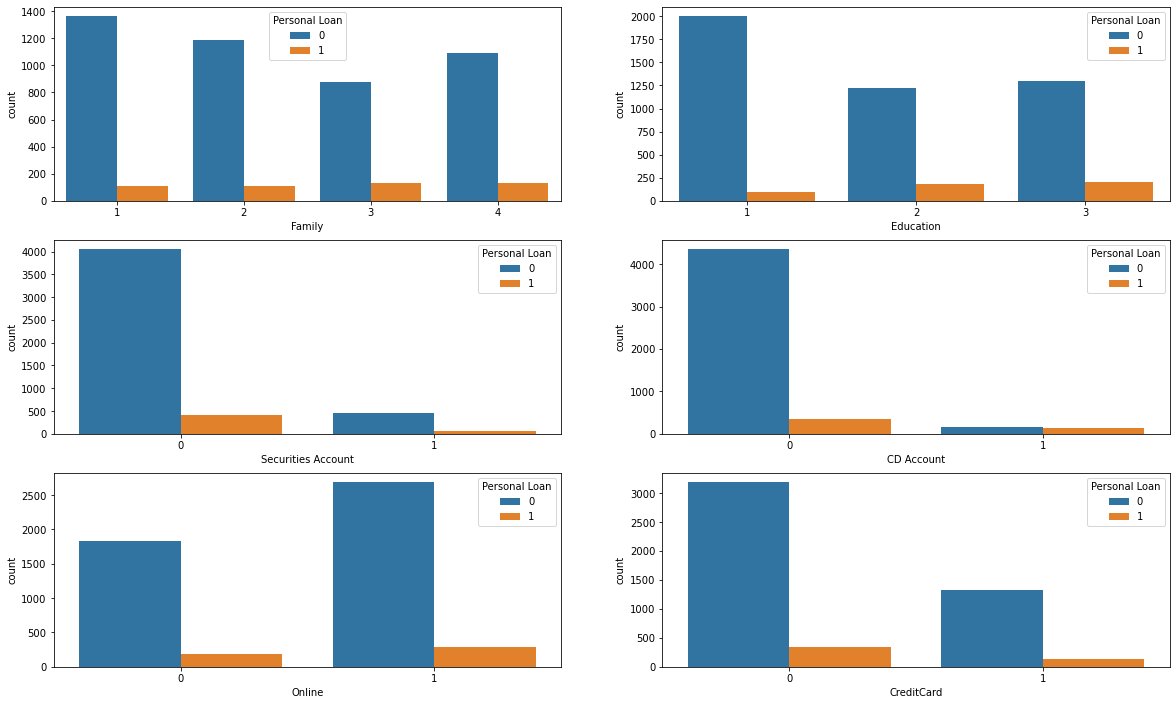

In [90]:
# Plot the distribution graph for categorical variable against target variable (Personal Loan)
catvariable = categorical_variables.copy()
catvariable.remove("Personal Loan")
plt.figure(figsize=(20,25))
for i,col in enumerate(catvariable):
        plt.subplot(6,2,i+1)
        sns.countplot(dfbank[col], hue=dfbank["Personal Loan"])
    

<b>Observation 14:</b>
- Customers with CD Account have more chances of having Personal Loan

### 4. Split the data into training and test set in the ratio of 70:30 respectively 

###### Handling negative values in Experience

In [91]:
# Find the unique ages which have -1, -2 and -3 entries in the Experience attribute
dfbank[dfbank['Experience'] == -1]['Age'].value_counts()

25    17
24     6
23     6
29     3
26     1
Name: Age, dtype: int64

In [92]:
dfbank[dfbank['Experience'] == -2]['Age'].value_counts()

24    9
23    4
28    1
25    1
Name: Age, dtype: int64

In [93]:
dfbank[dfbank['Experience'] == -3]['Age'].value_counts()

23    2
24    2
Name: Age, dtype: int64

In [94]:
# Find mean of positive experience values between age 23 and 29 and replace -1 with mean. 
# In similar way, find mean of positive experience values between age 23 and 25 and replace -2 with mean.
# Find mean of positive experience values between age 23 and 24 and replace -3 with mean
lst = [-1,-2,-3]
for i in lst:
    e1 = dfbank[dfbank['Experience'] == i]['Age'].value_counts().index.tolist()
    ind1 = dfbank[dfbank['Experience'] == i]['Experience'].index.tolist()
    for j in ind1:
        dfbank.loc[j,'Experience'] = dfbank[(dfbank['Age'].isin(e1)) & (dfbank.Experience >= 0)].Experience.mean()
    

###### Handling Ordinal categorical variables

In [95]:
# Handling ordinal categorical variables using get_dummies
dfbank = pd.get_dummies(dfbank, columns=['Family'])
dfbank = pd.get_dummies(dfbank, columns=['Education'])

###### Spliting training and test set

In [96]:
# Spliting independent variables and depended variable

X=dfbank.drop('Personal Loan',axis=1) #Independent variables
y=dfbank['Personal Loan'] #Dependent variable

# Spliting 70% traning set and 30% test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [97]:
# Verify the record count in training set
X_train.shape

(3500, 17)

In [98]:
# Verify the record count in test set
X_test.shape

(1500, 17)

In [99]:
# Verify the category value count of target variable in test set
y_test.value_counts()

0    1343
1     157
Name: Personal Loan, dtype: int64

In [100]:
# Verify the category value count of target variable in traing set
y_train.value_counts()

0    3177
1     323
Name: Personal Loan, dtype: int64

<b>Observation 15:</b>
- There is a high amount of class imbalance in target variable 

### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 

##### Handling Outlier

In [101]:
# Handle the outlier using PowerTransformer
col = X_train.columns

# Initializing the PowerTransformer and apply
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=col)
X_test = pd.DataFrame(pt.transform(X_test), columns=col)


Text(0.5, 1.0, 'After Outlier Removal for Income')

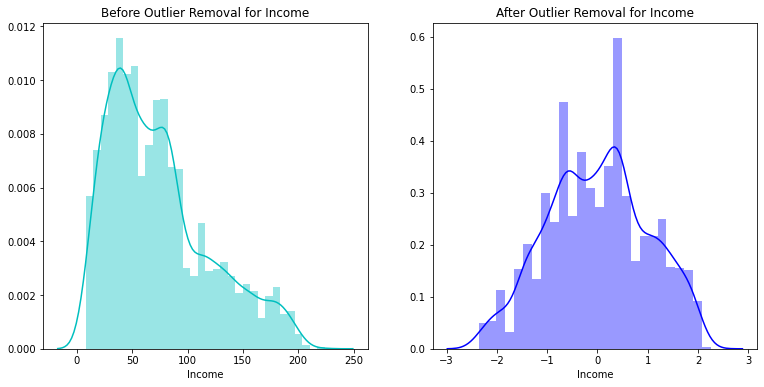

In [102]:
# Verify the Income attribute after applying PowerTransformer 

fig = plt.figure(figsize = (12.8, 6))
ax = fig.add_subplot(121)
sns.distplot(dfbank['Income'], color = 'c', 
             ax = ax).set_title('Before Outlier Removal for Income')

ax= fig.add_subplot(122)
sns.distplot(X_train['Income'], color = 'b', 
             ax = ax).set_title('After Outlier Removal for Income')



Text(0.5, 1.0, 'After Outlier Removal for Mortgage')

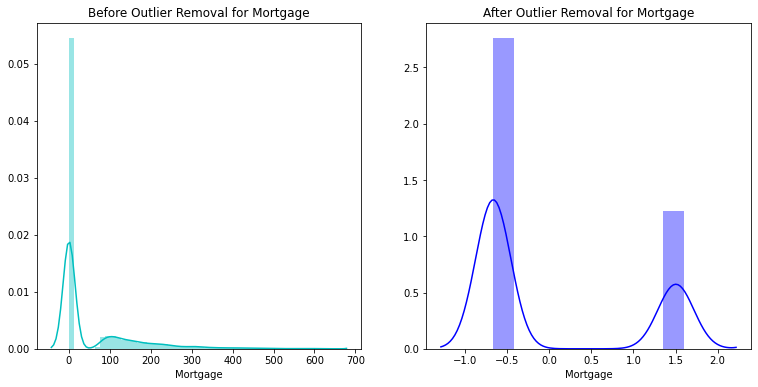

In [103]:
# Verify the Mortgage attribute after applying PowerTransformer 
fig = plt.figure(figsize = (12.8, 6))
ax = fig.add_subplot(121)
sns.distplot(dfbank['Mortgage'], color = 'c', 
             ax = ax).set_title('Before Outlier Removal for Mortgage')

ax= fig.add_subplot(122)
sns.distplot(X_train['Mortgage'], color = 'b', 
             ax = ax).set_title('After Outlier Removal for Mortgage')

Text(0.5, 1.0, 'After Outlier Removal for CCAvg')

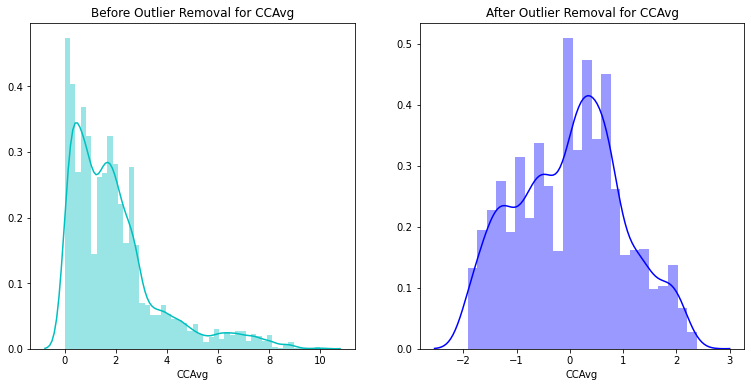

In [104]:
# Verify the CCAvg attribute after applying PowerTransformer
fig = plt.figure(figsize = (12.8, 6))
ax = fig.add_subplot(121)
sns.distplot(dfbank['CCAvg'], color = 'c', 
             ax = ax).set_title('Before Outlier Removal for CCAvg')

ax= fig.add_subplot(122)
sns.distplot(X_train['CCAvg'], color = 'b', 
             ax = ax).set_title('After Outlier Removal for CCAvg')

Text(0.5, 1.0, 'After Outlier Removal for Zip Code')

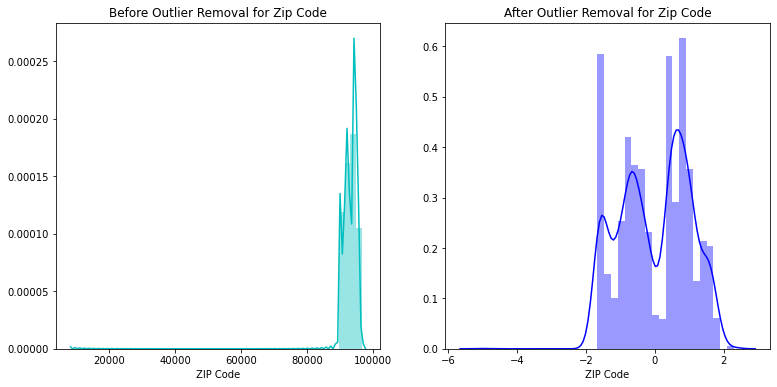

In [105]:
# Verify the Zip Code attribute after applying PowerTransformer
fig = plt.figure(figsize = (12.8, 6))
ax = fig.add_subplot(121)
sns.distplot(dfbank['ZIP Code'], color = 'c', 
             ax = ax).set_title('Before Outlier Removal for Zip Code')

ax= fig.add_subplot(122)
sns.distplot(X_train['ZIP Code'], color = 'b', 
             ax = ax).set_title('After Outlier Removal for Zip Code')

##### Model Building - KNN

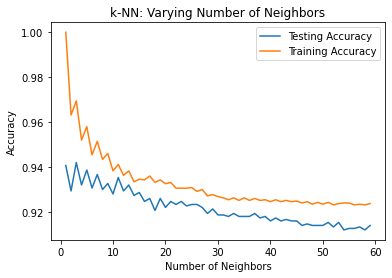

In [106]:
# Find the best K-Neighbor value (Note: Scaling is handled through PowerTransformer)

# Set the K-Neighbor value range
neighbors = np.arange(1, 60)
trainaccplot = np.empty(len(neighbors))
testaccplot = np.empty(len(neighbors))

# Verify the accuracy for each K-Neighbor value from 1 to 60
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    trainaccplot[i] = knn.score(X_train,y_train)
    testaccplot[i] = knn.score(X_test, y_test)
    

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, testaccplot, label = 'Testing Accuracy')
plt.plot(neighbors, trainaccplot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()



<b>Observation 16:</b>
- Above graph shows best K-Neighbor value is 11 because training and testing accuracy scores are coming closure.  K-value from 0 to 10 shows more overfit when comapared to 11 and other k values are having less training and training scores than accuracy score of 11. 

In [107]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)
#Train the model using training sets
knn.fit(X_train, y_train)

# Predict the target value
y_pred = knn.predict(X_test)

# Find the training accuracy score
trainingaccuracy = knn.score(X_train, y_train)
print("Accuracy score on training set:", trainingaccuracy)

# Find the testing accuracy score
testingaccuracy = knn.score(X_test, y_test)
print("Accuracy score on testing set:", testingaccuracy)

# Find the model accuracy score
knnmodelaccuracy = accuracy_score(y_test, y_pred)
print("KNN model accuracy:", knnmodelaccuracy)

# Find F1 score
knn_f1_score = f1_score(y_test, y_pred)
print("KNN model F1 score:", knn_f1_score)

Accuracy score on training set: 0.9411428571428572
Accuracy score on testing set: 0.9353333333333333
KNN model accuracy: 0.9353333333333333
KNN model F1 score: 0.5688888888888889


##### Model Building - Logistic Regression

In [108]:
#Create a Logistic Regression Classifier
lgr = LogisticRegression()

#Train the model using the training sets
lgr.fit(X_train, y_train)

# Predict the target variable
y_lgrpred = lgr.predict(X_test)

# Find the training accuracy score
traininglgraccuracy = lgr.score(X_train, y_train)
print("Accuracy score on training set:", traininglgraccuracy)

# Find the testing accuracy score
testinglgraccuracy = lgr.score(X_test, y_test)
print("Accuracy score on testing set:", testinglgraccuracy)

# Find the model accuracy score
lgrmodelaccuracy = accuracy_score(y_test, y_lgrpred)
print("Logistic model accuracy:", lgrmodelaccuracy)

# Find the F1-score
lgr_f1_score = f1_score(y_test, y_lgrpred)
print("Logistic model F1-Score:", lgr_f1_score)


Accuracy score on training set: 0.9642857142857143
Accuracy score on testing set: 0.9633333333333334
Logistic model accuracy: 0.9633333333333334
Logistic model F1-Score: 0.8096885813148789


##### Model Building - Naive Bayes

In [109]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the target variable
y_gnbpred = gnb.predict(X_test)

#Find the training accuracy
traininggnbaccuracy = gnb.score(X_train, y_train)
print("Accuracy score on training set:", traininggnbaccuracy)

#Find the testing accuracy
testinggnbaccuracy = gnb.score(X_test, y_test)
print("Accuracy score on testing set:", testinggnbaccuracy)

#Find the model accuracy
nbmodelaccuracy = accuracy_score(y_test, y_gnbpred)
print("Naive Bayes model accuracy:", nbmodelaccuracy)

#Find the model F1-Score
gnb_f1_score = f1_score(y_test, y_gnbpred)
print("Naive Bayes model F1-Score:", gnb_f1_score)

Accuracy score on training set: 0.9371428571428572
Accuracy score on testing set: 0.9393333333333334
Naive Bayes model accuracy: 0.9393333333333334
Naive Bayes model F1-Score: 0.6738351254480286


### 6. Print the confusion matrix for all the above models

###### K-NN Confusion Matrix

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1343
           1       0.94      0.41      0.57       157

    accuracy                           0.94      1500
   macro avg       0.94      0.70      0.77      1500
weighted avg       0.94      0.94      0.92      1500



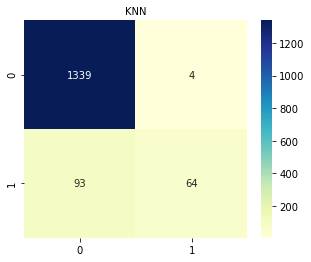

In [110]:
# Plot the confustion matrix for KNN
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='YlGnBu')
plt.title("KNN", fontsize =10)

#Print the classification report
print(classification_report(y_test, y_pred))


<b>Observation 17:</b>
- Model predicted 94% (1403/1500) correctly. 
- <b>True Negative:</b> Model predicted correctly for 1339 customers who not opted personal loan
- <b>True Positive:</b> Model predicted correctly for 64 customers who opted personal loan.    
- <b>False Positive:</b> Model predicted 4 customers opted personal loan but not in real case. 
- <b>False Negative:</b> Model predicted 93 customers not opted personal but they are opted personal loan. 
- Recall score close to 100% infers, among customers who not bought the loan our model predicted 100% to be right.
- Precision score of 94% implies model predicted total 68 cusotmers opted personal loan but prediction is correct for 64 customers and incorrect for 4 customers. Precision 94% shows model predicted total 1432 customers not opted personal loan but prediction is correct for 1339 customers and remaining 93 customaters opted in reality.  


###### Logistic Regression Confusion Matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.89      0.75      0.81       157

    accuracy                           0.96      1500
   macro avg       0.93      0.87      0.89      1500
weighted avg       0.96      0.96      0.96      1500



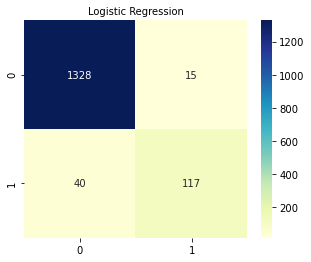

In [111]:
#Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_lgrpred),annot=True,fmt='',cmap='YlGnBu')
plt.title("Logistic Regression", fontsize =10)

#Print the classification report
print(classification_report(y_test, y_lgrpred))

<b>Observation 18:</b>
- Model predicted 96% (1445/1500) correctly. 
- <b>True Negative:</b> Model predicted correctly for 1328 customers who not opted personal loan
- <b>True Positive:</b> Model predicted correctly for 117 customers who opted personal loan.    
- <b>False Positive:</b> Model predicted 15 customers opted personal loan but not in real case. 
- <b>False Negative:</b> Model predicted 40 customers not opted personal but actually they are opted personal loan. 
- Recall of 99% infers, among customers who not bought the loan our model predicted 99% to be right.
- Precision score of 89% implies model predicted total 132 cusotmers opted personal loan but prediction is correct for 117 customers and incorrect for 15 customers. Precision 97% shows model predicted total 1368 customers are not opted personal loan but prediction is correct for 1328 customers and remaining 40 customers opted personal loan in reality.  


###### Naive Bayes Confusion Matrix

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1343
           1       0.77      0.60      0.67       157

    accuracy                           0.94      1500
   macro avg       0.86      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



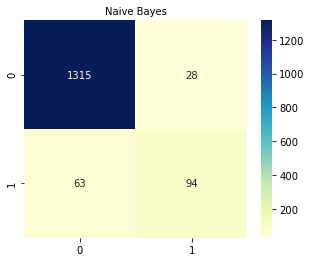

In [112]:
#Plot the confusion matrix for Naive Bayes
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_gnbpred),annot=True,fmt='',cmap='YlGnBu')
plt.title("Naive Bayes", fontsize =10)

#Print the classification report
print(classification_report(y_test, y_gnbpred))

<b>Observation 19:</b>
- Model predicted 94% (1409/1500) correctly.
- <b>True Negative:</b> Model predicted correctly for 1315 customers who not opted personal loan
- <b>True Positive:</b> Model predicted correctly for 94 customers who opted personal loan.
- <b>False Positive:</b> Model predicted 28 customers opted personal loan but not in real case.
- <b>False Negative:</b> Model predicted 63 customers not opted personal but actually they are opted personal loan.
- Recall of 98% infers, among customers who not bought the loan our model predicted 98% to be right.
- Precision score of 77% implies model predicted total 122 cusotmers opted personal loan but prediction is correct for 94 customers and incorrect for 28 customers. Precision 95% shows model predicted total 1378 customers are not opted personal loan but prediction is correct for 1315 customers and remaining 63 customers opted personal loan in reality.

### 7. Give your reasoning on which is the best model in this case and why it performs better?

###### Model comparison with AUC-ROC Curve

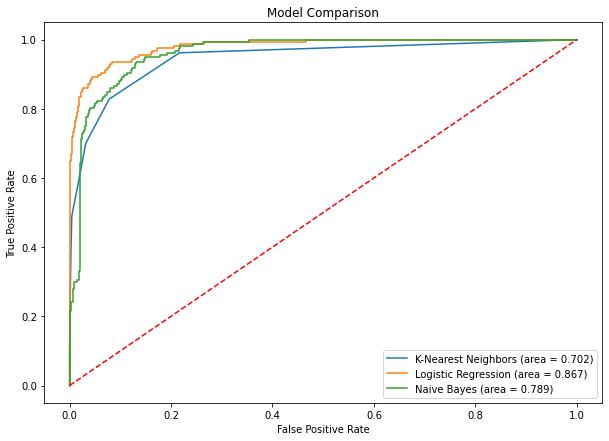

In [113]:
#comparing auc roc curve of all the models 

# Get the area under curve for KNN
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
# Get False possitive rate and True possiteve rate for K-NN
fpr1, tpr1, threshold1 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Get the area under curve for Logistic Regression
lgr_roc_auc = roc_auc_score(y_test, lgr.predict(X_test))
# Get False possitive rate and True possiteve rate for Logistic Regression
fpr2, tpr2, threshold2 = roc_curve(y_test, lgr.predict_proba(X_test)[:,1])

# Get the area under curve for Naive Bayes
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
# Get False possitive rate and True possiteve rate for Naive Bayes
fpr3, tpr3, threshold3 = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])

# Plot the graph 
plt.figure(figsize=(10,7))
plt.plot(fpr1, tpr1, label='K-Nearest Neighbors (area = %0.3f)' % knn_roc_auc)
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.3f)' % lgr_roc_auc)
plt.plot(fpr3, tpr3, label='Naive Bayes (area = %0.3f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Comparison')
plt.legend(loc="lower right")
plt.show()

<b>Observation 20:</b>
- AUC-ROC curve is a performance measurement for classification problem at various threshold settings.
- ROC is a probability curve and AUC respresents deagree of measure of separability. It shows how much model is capable of distinguishing between classes.
- Higher the AUC, better the model is at distinguishing between a customer buying personal Loan and Not buying Personal Loan.
- An excellent model has AUC near to the 1 which means it has good measure of separability. Howerver, the orang line shows that  Logistic Regression model covers more region and 86% can predict the class covering both customers who will buy and not buy personal loan. 
- The next model better models Naive Bayes model which shows that 78% can predict the class covering both customers who will buy  and not buy personal loan.
- K-NN model accuray is less than other two model. It shows 70% can predict the target class. 

###### Model comparison with F1-Score

K-NN: 0.477945 (0.110875)
Logistic Regression: 0.764615 (0.062596)
Naive Bayes: 0.586957 (0.074175)


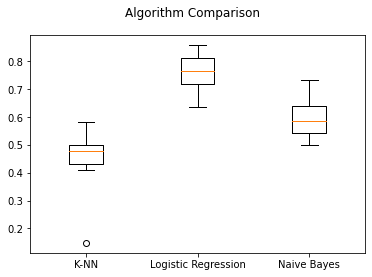

In [114]:
knn1 = KNeighborsClassifier(n_neighbors=11)
lr1 = LogisticRegression()
gb = GaussianNB()

models = []
models.append(('K-NN',  knn1))
models.append(('Logistic Regression',lr1))
models.append(('Naive Bayes', gb))

# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = KFold(n_splits=10,random_state=42)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<b>Observation 21:</b>
- Above F1-Score comparison shows Logistic Regression model performance is high when compare to K-NN and Naive Bayes modles.

###### Model comparison with Accuracy Score

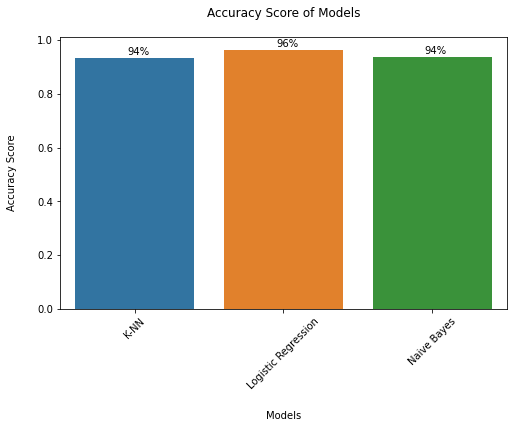

In [117]:
model_list = []
model_list.append('K-NN')
model_list.append('Logistic Regression')
model_list.append('Naive Bayes')

#Append the accuracy score of models to list
accuracy_score = []
accuracy_score.append(knnmodelaccuracy)
accuracy_score.append(lgrmodelaccuracy)
accuracy_score.append(nbmodelaccuracy)

#Plot the graph
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(model_list,accuracy_score)
ax.set_title("Accuracy Score of Models",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy Score",labelpad=20)
plt.xticks(rotation=45)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.35, y + height + 0.01))

<b>Observation 22:</b>
- Above graph shows Accuracy score for Logistic Regression is high when compare to other models. 
- F1-score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.
- Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
- Imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

#### Conclusion

- Among the 3 models that we have implemented Logistic Regression gives the best F1 Score and accuracy score with almost accuracy of 96% and F1-Score of 76%

### End Project